In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay, r2_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

1 - ESTRUTURAS DE DADOS

1.1 Lista de temperaturas

In [2]:
paises = [['África do Sul', -20.1, 50],
          ['Brasil', -14, 44.8],
          ['Canadá', -63, 45],
          ['Cuba', 0.6, 38.8],
          ['Espanha', -30, 47.2],
          ['Islândia', -37.9, 30.5],
          ['Nepal', -26, 46],
          ['Rússia', -67.8, 45.4],
          ['Síria', -1, 49.7],
          ['Vietnã', -6.1, 42.7]]

In [3]:
min_temp = paises[0][1]
min_temp_f = min_temp * 1.8 + 32
min_temp_f

-4.180000000000007

In [4]:
min_temp = paises[1][1]
min_temp_f = min_temp * 1.8 + 32
min_temp_f

6.800000000000001

In [5]:
min_temp = paises[2][1]
min_temp_f = min_temp * 1.8 + 32
min_temp_f

-81.4

In [6]:
for i in range(len(paises)):
    min_temp = paises[i][1]
    max_temp = paises[i][2]
    min_temp_f = min_temp * 1.8 + 32
    max_temp_f = max_temp * 1.8 + 32
    print(f'{paises[i][0]} - Min: {min_temp_f:.2f} F°, Máx: {max_temp_f:.2f} F°')

África do Sul - Min: -4.18 F°, Máx: 122.00 F°
Brasil - Min: 6.80 F°, Máx: 112.64 F°
Canadá - Min: -81.40 F°, Máx: 113.00 F°
Cuba - Min: 33.08 F°, Máx: 101.84 F°
Espanha - Min: -22.00 F°, Máx: 116.96 F°
Islândia - Min: -36.22 F°, Máx: 86.90 F°
Nepal - Min: -14.80 F°, Máx: 114.80 F°
Rússia - Min: -90.04 F°, Máx: 113.72 F°
Síria - Min: 30.20 F°, Máx: 121.46 F°
Vietnã - Min: 21.02 F°, Máx: 108.86 F°


1.2 Alturas

In [7]:
alt_paises = {'Alemanha':   181,
              'Brasil':     170.8,
              'Canadá':     174,
              'Cuba':       170.2,
              'Espanha':    175.62,
              'Islândia':   181.7,
              'Noruega':    179.5,
              'Rússia':     176,
              'Suíça':      178.1,
              'Vietnã':     165.76}
type(alt_paises)
alt_paises

{'Alemanha': 181,
 'Brasil': 170.8,
 'Canadá': 174,
 'Cuba': 170.2,
 'Espanha': 175.62,
 'Islândia': 181.7,
 'Noruega': 179.5,
 'Rússia': 176,
 'Suíça': 178.1,
 'Vietnã': 165.76}

In [8]:
print(f'{(alt_paises['Alemanha'] / 100) * 72.7 - 58}')

73.58700000000002


In [9]:
print(f'{(alt_paises['Brasil'] / 100) * 72.7 - 58}')

66.17160000000001


In [10]:
keys = alt_paises.keys()
for i in alt_paises:
    #print(alt_paises[i])
    print(f'{(alt_paises[i] / 100) * 72.7 - 58}')

73.58700000000002
66.17160000000001
68.498
65.7354
69.67574
74.0959
72.4965
69.95200000000001
71.4787
62.50752


1.3 Conversão de moedas

In [11]:
bolsa_pos = [["Nova Zelândia", 15000, "NZ$"],
             ["EUA", 66000/4,"US$"],
             ["Alemanha", 750*12,"EUR"]]

In [12]:
for i in range(len(bolsa_pos)):
    print(f'{bolsa_pos[i][0]} - Por hora: {bolsa_pos[i][1]/(40*52):.2f} - Por mês: {bolsa_pos[i][1]/12:.2f} - Por ano: {bolsa_pos[i][1]:.2f}')

Nova Zelândia - Por hora: 7.21 - Por mês: 1250.00 - Por ano: 15000.00
EUA - Por hora: 7.93 - Por mês: 1375.00 - Por ano: 16500.00
Alemanha - Por hora: 4.33 - Por mês: 750.00 - Por ano: 9000.00


2 - ESTRUTURAS DE DECISÃO

2.1 Temperatura

In [13]:
t = 40
for i in range(len(paises)):
    if(paises[i][2] >= t):
        print("Está quente.")
    elif(paises[i][1] <= t):
        print("Está frio.")

Está quente.
Está quente.
Está quente.
Está frio.
Está quente.
Está frio.
Está quente.
Está quente.
Está quente.
Está quente.


2.2 Combustíveis

In [14]:
descs = [["Álcool",     1.9, 0.97, 0.95],
         ["Gasolina",   2.5, 0.96, 0.94],]

qtd = int(input("Quantidade de combustível: "))
tipo = ""
preco = 0

while(tipo != 'a' and tipo != 'g'):
    tipo = input("Tipo de combustível (A-álcool | G-gasolina")
    tipo = tipo.lower()

print(qtd)

if(tipo == 'a'):
    alc = descs[0]
    if(qtd <= 20):
        preco = qtd * alc[1] * alc[2]
    elif(qtd > 20):
        preco = qtd * alc[1] * alc[3]
if(tipo == 'g'):
    gas = descs[1]
    if(qtd <= 20):
        preco = qtd * gas[1] * gas[2]
    elif(qtd > 20):
        preco = qtd * gas[1] * gas[3]

print(preco)

60
108.3


2.3 Frutas

In [15]:
frutas = [["Morango",   2.5, 2.2],
          ["Maçã",      1.8, 1.5]]

qtdMor = int(input("Digite a quantidade de morangos: "))
qtdMac = int(input("Digite a quantidade de maçãs: "))
qtdTot = qtdMor + qtdMac
precoTot, precoMor, precoMac = 0, 0, 0

if(qtdMor <= 5):
    precoMor = frutas[0][1] * qtdMor
elif(qtdMor > 5):
    precoMor = frutas[0][2] * qtdMor

if(qtdMac <= 5):
    precoMac = frutas[1][1] * qtdMac
elif(qtdMac > 5):
    precoMac = frutas[1][2] * qtdMac

precoTot = precoMor + precoMac

if(qtdTot > 8 or precoTot >25):
    precoTot *= 0.9

print(f'Preço total: R${precoTot:.2f}')

Preço total: R$118.98


3 - ESTRUTURAS DE REPETIÇÃO

3.1 - Tabuada

In [16]:
num = int(input("Digite um número de 1 a 10: "))

print(f'Tabuada de {num}:')
for i in range(1,11):
    print(f'{num} X {i} = {num*i}')

Tabuada de 5:
5 X 1 = 5
5 X 2 = 10
5 X 3 = 15
5 X 4 = 20
5 X 5 = 25
5 X 6 = 30
5 X 7 = 35
5 X 8 = 40
5 X 9 = 45
5 X 10 = 50


3.2 - Alturas e temps

In [17]:
for i in range(len(paises)):
    print(paises[i])

for i in alt_paises:
    print(alt_paises[i])

['África do Sul', -20.1, 50]
['Brasil', -14, 44.8]
['Canadá', -63, 45]
['Cuba', 0.6, 38.8]
['Espanha', -30, 47.2]
['Islândia', -37.9, 30.5]
['Nepal', -26, 46]
['Rússia', -67.8, 45.4]
['Síria', -1, 49.7]
['Vietnã', -6.1, 42.7]
181
170.8
174
170.2
175.62
181.7
179.5
176
178.1
165.76


3.3 - Itens do dict

In [18]:
for i in alt_paises.keys():
    print(f'{i} - {alt_paises[i]}')

Alemanha - 181
Brasil - 170.8
Canadá - 174
Cuba - 170.2
Espanha - 175.62
Islândia - 181.7
Noruega - 179.5
Rússia - 176
Suíça - 178.1
Vietnã - 165.76


4 - FUNÇÕES

4.1 - Reverso

In [19]:
def reverterNum(num):
    numRev = list(str(num))
    numRev.reverse()
    numRev = int("".join(numRev))
    return numRev


print(reverterNum(543))


345


4.2 - Converter temp

In [20]:
def convTemp(temp, esc):
    esc = esc.lower()
    # if(esc != "f" and esc != "c"):
    if(esc == "f"):
        return temp * 1.8 + 32
    elif(esc == "c"):
        return (5/9) * (temp - 32)
    else:
        return print("Escala não válida.")
    
temp = int(input("Temperatura: "))
esc = input("Pra qual unidade quer converter (C-celsius | F-Fahrenheit)")

convTemp(temp, esc)

5.555555555555555

4.3 - 24h para 12h

In [21]:
def cnvHr(hr):
    indHr = ""

    if(hr > 12):
        hr -= 12
        indHr = "P.M."
    
    return f'{hr}:{min} {indHr}'

hra = int(input("Horas: "))
min = int(input("Minutos: "))
print(cnvHr(hra))


11:56 P.M.


5 - NUMPY

5.1 - Matriz

In [22]:
matriz = np.random.normal(10, 5, (4,10))
for i in range(4):
    if(matriz[i][0] > 12):
        matriz[i][0] = 0
matriz

array([[-0.75920334,  8.40241557, 11.84800193,  8.65829549, 17.68698361,
         5.75438854,  7.47646104,  4.5051824 , 12.89511469, 13.32758585],
       [ 7.45685323, 12.68594826, 18.9536826 , 13.52877514,  9.18103021,
        13.33037191, 14.69536202,  5.83328964, 17.45999008, 17.22277797],
       [ 9.68599296,  9.86658538,  9.54696572, 13.15431374, 11.02081882,
         8.97953345, 11.01006511, 12.72503009,  2.7348339 , 11.6804484 ],
       [ 0.        , 14.32918378,  9.26614247, 15.13997891, 12.34452429,
         3.19778366, 11.01947391, 14.2672814 ,  8.23630401, 10.94731757]])

5.2 - Matriz de peso ideal

In [ ]:
matriz2 = np.array([[187, 176, 155],
                    [165, 177, 145],
                    [195, 184, 181]])
matrizPesosIdeais = np.zeros((3,3))
soma = 0

for i in range(len(matriz2)):
    for j in range(len(matriz2[i])):
        matrizPesosIdeais[i][j] = ((matriz2[i][j]/100) ** 2) * 22

# Não entendi direito a proposta, mas pelo que entendi foi isso:
for i in range(len(matriz2)):
    for j in range(len(matriz2[i])):
        soma += matriz2[i][j] * matrizPesosIdeais[i][j]

print(soma)

106424.9054


5.3 - Multiplicação de matriz

In [ ]:
def multMatriz(mtz, num):
    for i in range(len(mtz)):
        for j in range(len(mtz[i])):
            mtz[i][j] *= num
    return mtz

print(multMatriz(matriz2, 2))

[[374 352 310]
 [330 354 290]
 [390 368 362]]


6 - PANDAS

6.1 - Médias e desvios padrões

In [9]:
df_bikes = pd.read_csv("bicicletas.csv")
df_bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [14]:
def printMeanDP():
    meanSeason = df_bikes["season"].mean()
    meanHoliday = df_bikes["holiday"].mean()
    dpSeason = df_bikes["season"].std()
    dpHoliday = df_bikes["holiday"].std()
    print(f'Média season: {meanSeason:.4f} - Média holiday: {meanHoliday:.4f} - DP season: {dpSeason:.4f} - DP holiday: {dpHoliday:.4f}')
    
printMeanDP()

Média season: 2.5066 - Média holiday: 0.0286 - DP season: 1.1162 - DP holiday: 0.1666


6.2 - Separando coluna com condição

In [63]:
df_bikes2 = df_bikes.copy()
mes_bikes = []

for i in df_bikes2["datetime"]:
    mes_bikes.append(int(i[5:7]))

df_bikes2["month"] = mes_bikes

In [64]:
def getMes(df, mes):
    dfSep = df[df_bikes2["month"] == mes]
    return dfSep

dfMes = getMes(df_bikes2, 3)
dfMes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month
877,2011-03-01 00:00:00,1,0,1,1,12.30,13.635,70,31.0009,0,7,7,3
878,2011-03-01 01:00:00,1,0,1,1,10.66,11.365,70,23.9994,0,3,3,3
879,2011-03-01 02:00:00,1,0,1,1,9.84,10.605,65,26.0027,0,4,4,3
880,2011-03-01 03:00:00,1,0,1,1,9.02,10.605,69,19.0012,0,2,2,3
881,2011-03-01 04:00:00,1,0,1,1,9.02,10.605,69,16.9979,0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6780,2012-03-19 19:00:00,1,0,1,1,25.42,30.305,61,15.0013,86,463,549,3
6781,2012-03-19 20:00:00,1,0,1,1,24.60,30.305,64,15.0013,34,296,330,3
6782,2012-03-19 21:00:00,1,0,1,1,24.60,30.305,64,11.0014,33,190,223,3
6783,2012-03-19 22:00:00,1,0,1,2,22.96,26.515,73,11.0014,17,131,148,3


6.3 - Histograma e Boxplo

<Axes: >

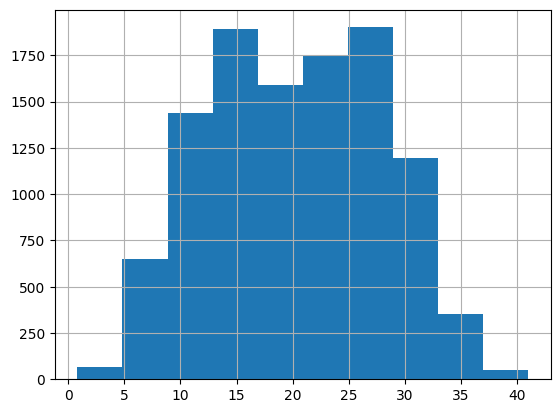

In [65]:
histTemp = df_bikes2["temp"].hist()
histTemp

<Axes: title={'center': 'temp'}, xlabel='month'>

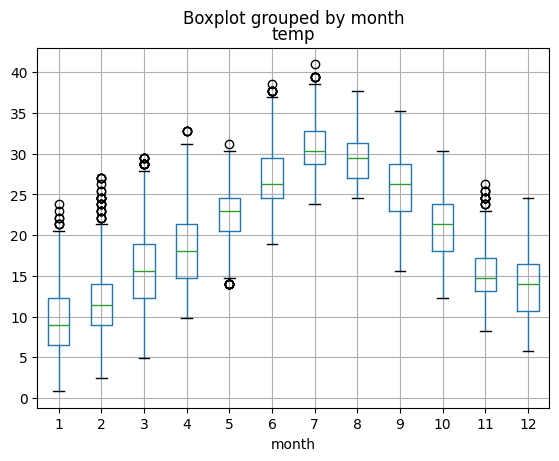

In [79]:
# tempByMonth = df_bikes2.groupby("month")["temp"].mean()
bpTempByMonth = df_bikes2.boxplot(column="temp", by="month")
bpTempByMonth


7 - REGRESSÃO

O modelo de regressão é uma técnica estatística e de aprendizado de máquina usada para prever um valor numérico com base em outros dados. Em essência, ele tenta entender e modelar a relação entre uma variável dependente (o valor que queremos prever) e uma ou mais variáveis independentes (os dados de entrada).

A regressão calcula uma função matemática que melhor se ajusta aos dados, permitindo que façamos previsões para novos dados. A forma mais simples é a regressão linear, que tenta traçar uma linha reta que melhor representa a relação entre duas variáveis.

In [5]:
ds = sns.load_dataset("penguins")
ds

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [30]:
ds_males = ds[ds["island"] == "Biscoe"]
X = ds_males[["body_mass_g"]].fillna(ds["body_mass_g"].mean())
y = ds_males["bill_length_mm"].fillna(ds["bill_length_mm"].mean())

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

r2 = r2_score(y, y_pred)
coef = round(model.coef_[0], 2)
intercept = round(model.intercept_, 2)

print(f'R²: {round(r2, 2)}')
print(f'Coeficiente da regressão: {coef}')
print(f'Intercepto: {intercept}')

R²: 0.75
Coeficiente da regressão: 0.01
Intercepto: 20.35


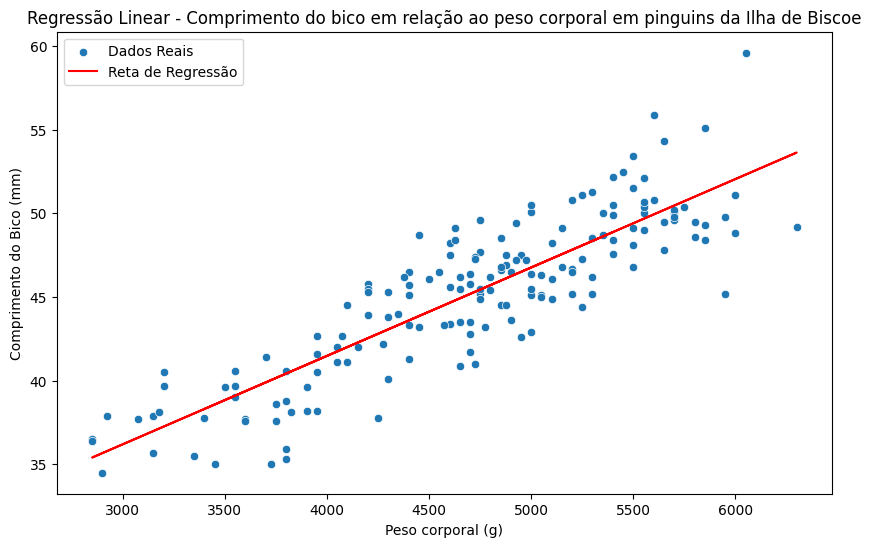

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['body_mass_g'], y=y, label='Dados Reais')
plt.plot(X['body_mass_g'], y_pred, color='red', label='Reta de Regressão')
plt.title('Regressão Linear - Comprimento do bico em relação ao peso corporal em pinguins da Ilha de Biscoe')
plt.xlabel('Peso corporal (g)')
plt.ylabel('Comprimento do Bico (mm)')
plt.legend()
plt.show()

8 - CLASSIFICAÇÃO

O modelo de classificação é uma técnica de aprendizado de máquina usada para categorizar dados em classes ou categorias predefinidas. Em vez de prever valores numéricos (como na regressão), a classificação prevê rótulos ou classes para novos dados com base em padrões identificados nos dados de treinamento.

Os modelos de classificação analisam exemplos rotulados (dados de treinamento) e aprendem padrões que diferenciam as classes. Ao receber novos dados, o modelo usa esses padrões para prever a qual classe esses dados provavelmente pertencem.

In [2]:
ds2 = sns.load_dataset("diamonds")
ds2

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
scaler = StandardScaler()
ds2['carat_scaled'] = scaler.fit_transform(ds2[['carat']])
ds2['cut_encoded'] = LabelEncoder().fit_transform(ds2['cut'])
ds2['color_encoded'] = LabelEncoder().fit_transform(ds2['color'])

ds2['price_class'] = pd.qcut(ds2['price'], q=4, labels=[0, 1, 2, 3])

,carat,cut,color,clarity,depth,table,price,x,y,z,carat_scaled,cut_encoded,color_encoded,price_class
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,-1.198168,2,1,0
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,-1.240361,3,1,0
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,-1.198168,1,1,0
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,-1.071587,3,5,0
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,-1.029394,1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50,-0.164427,2,0,2
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61,-0.164427,1,0,2
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56,-0.206621,4,0,2
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,0.130927,3,4,2


In [6]:
X = ds2[['carat_scaled', 'cut_encoded', 'color_encoded']]
y = ds2['price_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Acurácia: 0.81


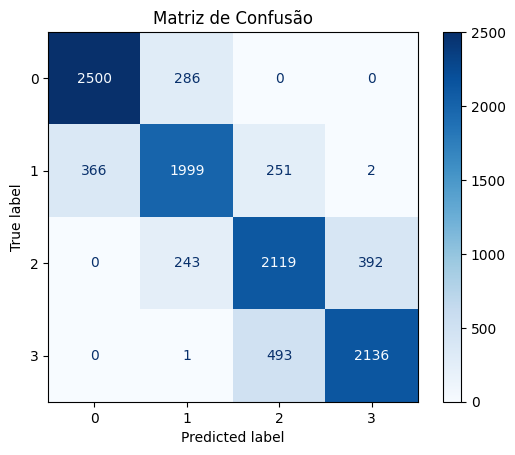

In [10]:
accuracy = accuracy_score(y_test, y_pred) 
print(f'Acurácia: {accuracy:.2f}')

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.show()

9 - AGRUPAMENTO

A Análise de Componentes Principais (PCA) é uma técnica de redução de dimensionalidade usada para simplificar grandes conjuntos de dados. O PCA transforma os dados em um novo sistema de coordenadas, criando componentes principais que explicam a maior parte da variação nos dados. Cada componente principal é uma combinação linear das variáveis originais e é ordenado de forma que o primeiro componente explica a maior quantidade de variabilidade nos dados, o segundo um pouco menos, e assim por diante.

O PCA pega um conjunto de variáveis correlacionadas e as transforma em um conjunto menor de variáveis não correlacionadas (componentes principais), que ainda preserva a maioria das informações originais. Esse processo ajuda a reduzir a quantidade de dados mantendo o máximo de informação possível.

In [13]:
health_exp = sns.load_dataset("healthexp")
health_exp

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9
...,...,...,...,...
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7


In [14]:
numeric_cols = health_exp.select_dtypes(include='number').columns
df_numeric = health_exp[numeric_cols]
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df_numeric)

In [15]:
pca = PCA()
pca_components = pca.fit_transform(df_normalized)
explained_variance = pca.explained_variance_ratio_
print("Variância explicada por cada componente:", explained_variance)

Variância explicada por cada componente: [0.84876745 0.14152702 0.00970553]


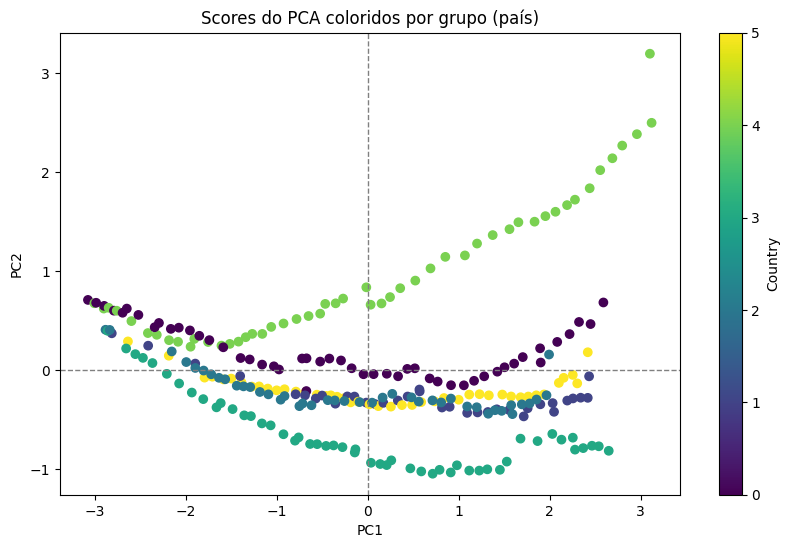

In [19]:
df_pca = pd.DataFrame(pca_components, columns=[f'PC{i+1}' for i in range(len(explained_variance))])
df_pca['Country'] = health_exp['Country']  

plt.figure(figsize=(10, 6))
scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'], c=pd.factorize(df_pca['Country'])[0], cmap='viridis')
plt.colorbar(scatter, label='Country')
plt.title('Scores do PCA coloridos por grupo (país)')
plt.axhline(0, color='grey', linestyle='--', linewidth=1)
plt.axvline(0, color='grey', linestyle='--', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()